In [1]:
#Import Dependencies
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy

#Import API Key
from api_keys import weather_api_key

#Output File
output_data_file = "output_data/cities.csv"

#Identify ranges 
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#List for holding Lat_Lngs and Cities  
lat_lngs = []
cities = []

#Create a set of random Lat and Lng combos
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#identify nearest city for combos
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#Unique cities get added to cities list 
    if city not in cities:
        cities.append(city)

#print the city county 
len(cities)

597

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query = f"{url}appid={weather_api_key}&units={units}&q="
print(query)

http://api.openweathermap.org/data/2.5/weather?appid=6414300d523f66acd2efe2f48b9eb502&units=imperial&q=


In [4]:
lat = []
long = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
country=[]

In [5]:
for x in range(len(cities)):
    response = requests.get(f"{query}{cities[x]}").json()
    
    try:
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except KeyError:
        temp.append(0)
        lat.append(0)
        long.append(0)
        humidity.append(0)
        wind_speed.append(0)
        country.append(0)
        date.append(0)
    
    try:
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        cloudiness.append(0)
        
        print(f"Processing record {x + 1} | {cities[x]}")
        print(f"{query}{cities[x]}")

print("--------------------------------------------")
print("Data Processing Complete")
print("--------------------------------------------")

city_df = pd.DataFrame({"City": cities,
                           "Latitude": lat,
                           "Longitude": long,
                           "Humidity": humidity,
                           "Max Temp": temp,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Date": date,
                           "Country":country
                          })

Processing record 12 | halalo
http://api.openweathermap.org/data/2.5/weather?appid=6414300d523f66acd2efe2f48b9eb502&units=imperial&q=halalo
Processing record 15 | dien bien
http://api.openweathermap.org/data/2.5/weather?appid=6414300d523f66acd2efe2f48b9eb502&units=imperial&q=dien bien
Processing record 34 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?appid=6414300d523f66acd2efe2f48b9eb502&units=imperial&q=illoqqortoormiut
Processing record 42 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?appid=6414300d523f66acd2efe2f48b9eb502&units=imperial&q=attawapiskat
Processing record 67 | berdyuzhye
http://api.openweathermap.org/data/2.5/weather?appid=6414300d523f66acd2efe2f48b9eb502&units=imperial&q=berdyuzhye
Processing record 84 | belushya guba
http://api.openweathermap.org/data/2.5/weather?appid=6414300d523f66acd2efe2f48b9eb502&units=imperial&q=belushya guba
Processing record 89 | vaitupu
http://api.openweathermap.org/data/2.5/weather?appid=6414300d523f66ac

In [6]:
city_df = pd.DataFrame({"City":city,
                        "Cloudiness": cloudiness,
                        "Date": date,
                        "Humidity": humidity,
                        "Latitude": lat,
                        "Longitude": long,
                        "Max Temp": temp,
                        "Wind Speed": wind_speed})

city_df.count()

City          597
Cloudiness    597
Date          597
Humidity      597
Latitude      597
Longitude     597
Max Temp      597
Wind Speed    597
dtype: int64

In [7]:
pd.DataFrame.to_csv(city_df, 'city_data.csv')

city_df = pd.DataFrame({"City":cities,
                        "Cloudiness": cloudiness,
                        "Date": date,
                        "Humidity": humidity,
                        "Latitude": lat,
                        "Longitude": long,
                        "Max Temp": temp,
                        "Wind Speed": wind_speed})

city_df.head()

,City,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,liepaja,87,1583212070,100,56.54,21.04,41.00,4.70
1,vila franca do campo,75,1583212070,93,37.72,-25.43,64.40,16.11
2,atuona,35,1583212070,77,-9.80,-139.03,82.27,18.14
3,mairang,75,1583212070,78,25.57,91.63,75.20,8.05
4,sisimiut,0,1583212071,75,66.94,-53.67,-19.25,7.96


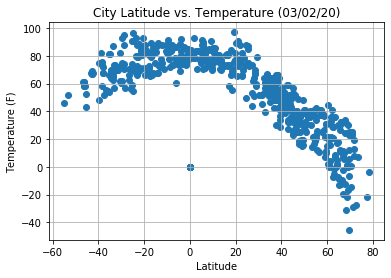

In [8]:
plt.scatter(city_df['Latitude'], city_df['Max Temp'])
plt.title(f"City Latitude vs. Temperature ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.savefig('lat_temp.png', bbox_inches='tight')

#The graph is showing how max temperature changes based on the latitude of a location, the higher the latitutde
# the lower the max temp and vice versa. 

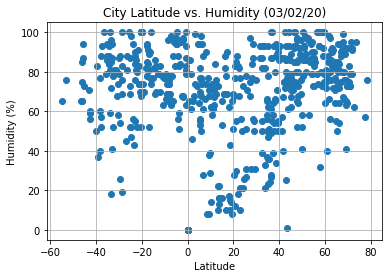

In [9]:
plt.scatter(city_df['Latitude'], city_df['Humidity'])
plt.title(f"City Latitude vs. Humidity ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('lat_humid.png', bbox_inches='tight')

# The graph shows the comparison between latitude and humidity, there isn't too much to say based on this graph
# latitue has no effect on humidity 

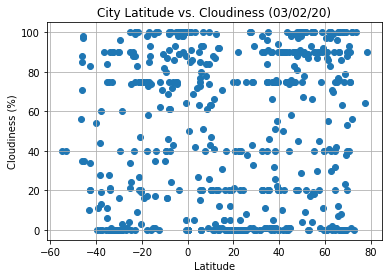

In [10]:
plt.scatter(city_df['Latitude'], city_df['Cloudiness'])
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('lat_cloud.png', bbox_inches='tight')

# The graph is showing cloudiness levels in different locations, again there isnt much of a comparison between latitude
# and cloudiness level 

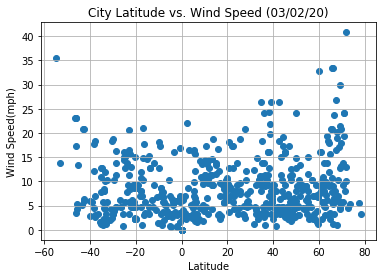

In [11]:
plt.scatter(city_df['Latitude'], city_df['Wind Speed'])
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%x')})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.grid(True)
plt.savefig('lat_wind.png', bbox_inches='tight')

# The graph seems to be showng that places with higher latitude have lower wind speeds, but wind speeds in all locations
# seems to be about the same 

In [25]:
northern_hemi_df = city_df.loc[(city_df["Latitude"] >= 0)]
southern_hemi_df = city_df.loc[(city_df["Latitude"] < 0)]
southern_hemi_df.head()

,City,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
2,atuona,35,1583212070,77,-9.80,-139.03,82.27,18.14
5,richards bay,3,1583212071,76,-28.78,32.04,73.90,16.37
7,lorengau,90,1583212071,67,-2.02,147.27,85.46,2.98
9,kruisfontein,21,1583212072,81,-34.00,24.73,69.57,4.47
10,olinda,75,1583212072,74,-8.01,-34.86,84.20,5.82


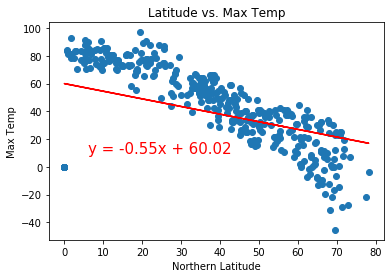

In [27]:
x_values = northern_hemi_df['Latitude']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"Latitude vs. Max Temp")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel('Max Temp')
plt.show()

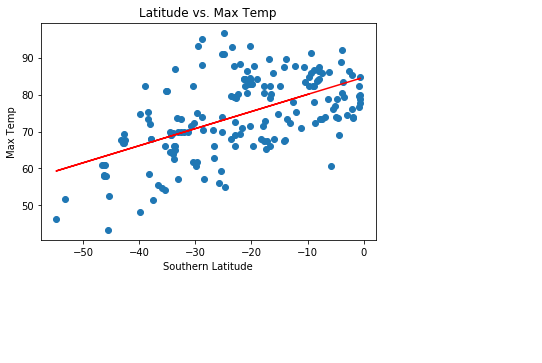

In [28]:
x_values = southern_hemi_df['Latitude']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title(f"Latitude vs. Max Temp")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Southern Latitude')
plt.ylabel('Max Temp')
plt.show()

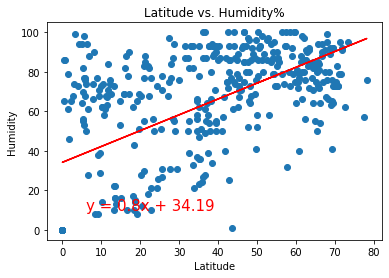

In [29]:
x_values = northern_hemi_df['Latitude'].astype("float")
y_values = northern_hemi_df['Humidity'].astype("float")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title(f"Latitude vs. Humidity%")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

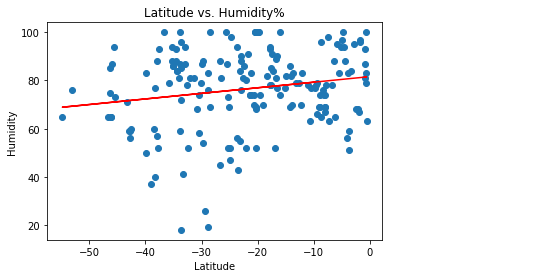

In [30]:
x_values = southern_hemi_df['Latitude'].astype("float")
y_values = southern_hemi_df['Humidity'].astype("float")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title(f"Latitude vs. Humidity%")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

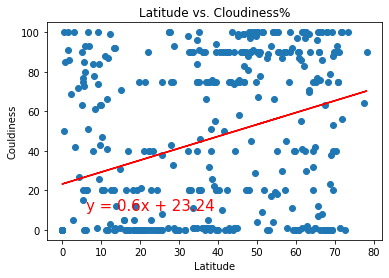

In [31]:
x_values = northern_hemi_df['Latitude'].astype("float")
y_values = northern_hemi_df['Cloudiness'].astype("float")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title(f"Latitude vs. Cloudiness%")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Couldiness')
plt.show()

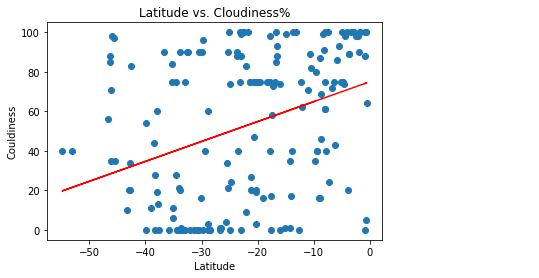

In [32]:
x_values = southern_hemi_df['Latitude'].astype("float")
y_values = southern_hemi_df['Cloudiness'].astype("float")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title(f"Latitude vs. Cloudiness%")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Couldiness')
plt.show()

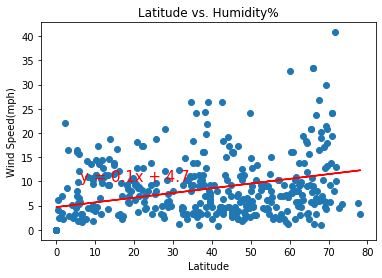

In [33]:
x_values = northern_hemi_df['Latitude'].astype("float")
y_values = northern_hemi_df['Wind Speed'].astype("float")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title(f"Latitude vs. Humidity%")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.show()

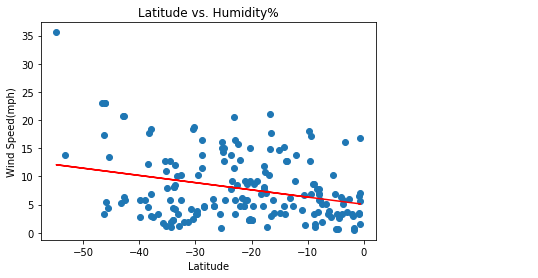

In [34]:
x_values = southern_hemi_df['Latitude'].astype("float")
y_values = southern_hemi_df['Wind Speed'].astype("float")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title(f"Latitude vs. Humidity%")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.show()

In [35]:
output_data_file = os.path.join("..", "output_data", "city_df.csv")